<a href="https://colab.research.google.com/github/srijita1406/Machine-Learning-Projects/blob/main/Predicting_customer_satisfaction_of_an_airline_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
rs = 64

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV, KFold

# Estimators
from sklearn.linear_model import LogisticRegression,Perceptron,SGDClassifier
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive/', force_remount=True)

In [ ]:
dataset = 'V3'
# data = pd.read_csv(f'/content/{dataset}.csv')
data = pd.read_csv(f"/content/gdrive/MyDrive/OPPE2 April 16/Dataset Versions/{dataset}.csv")

In [ ]:
data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,0.500000,0.342084,0.6,0.8,0.6,1.0,0.2,0.6,0.00,0.2,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.794872,0.086228,0.8,0.0,0.8,0.8,0.8,0.8,0.00,0.8,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.474359,0.151454,0.6,0.8,0.6,0.6,0.4,1.0,0.75,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.564103,0.068457,1.0,1.0,0.6,1.0,0.6,0.8,0.75,0.8,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.538462,0.567447,0.4,0.4,0.4,0.4,0.8,1.0,0.75,0.6,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                20718 non-null  float64
 1   Flight Distance                    20718 non-null  float64
 2   Inflight wifi service              20718 non-null  float64
 3   Departure/Arrival time convenient  20718 non-null  float64
 4   Ease of Online booking             20718 non-null  float64
 5   Gate location                      20718 non-null  float64
 6   Food and drink                     20718 non-null  float64
 7   Online boarding                    20718 non-null  float64
 8   Seat comfort                       20718 non-null  float64
 9   Inflight entertainment             20718 non-null  float64
 10  On-board service                   20718 non-null  float64
 11  Leg room service                   20718 non-null  flo

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
y.value_counts()

0.0    11717
1.0     9001
Name: satisfaction, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

# print(X_train.shape)
#print(X_test.shape)
print(y_train.shape)
#print(y_test.shape)

(16574,)


In [ ]:
logistic = LogisticRegression(solver='sag', 
                              tol=1e-3, 
                              max_iter=100, 
                              random_state =64)
logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

recall_score(y_test,y_pred)

0.84

In [ ]:
clf = Perceptron(random_state=64,fit_intercept=True, warm_start=False) 
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8429054054054054

In [ ]:
clf.intercept_

array([-10.])

In [ ]:
logistic_sgd = SGDClassifier(loss='log_loss',
                        penalty='l2',
                        max_iter=10,
                        warm_start=False,
                        eta0=0.01,
                        alpha=0.001,
                        learning_rate='constant',
                        random_state=64)

logistic_sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.001, eta0=0.01, learning_rate='constant', loss='log_loss',
              max_iter=10, random_state=64)

In [ ]:
f1_score(y_test,  logistic_sgd.predict(X_test))

0.8538350217076701

In [ ]:
knn_clf = KNeighborsClassifier(metric = 'minkowski', p = 2)

gs_cv = GridSearchCV(knn_clf,
                  param_grid= {'n_neighbors':[1,3,7,11]},
                  scoring='accuracy',
                  cv=5)

gs_cv.fit(X_train,y_train)
gs_cv.best_params_

{'n_neighbors': 7}

In [ ]:

dt_clf = DecisionTreeClassifier(random_state = 64)

params = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'min_samples_leaf': [2,4,6,8,10],
          'max_depth':[3,4,5,6]}

# t=KFold(n_splits = 4, random_state = 64)
gscv = GridSearchCV(dt_clf, 
                    params,
                    cv= 4,)

gscv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=64),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [ ]:
y_pred = gscv.best_estimator_.predict(X_test)
precision_score(y_test,y_pred)

0.9282051282051282

In [ ]:
gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       random_state=64)

In [ ]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 8,
 'splitter': 'best'}

In [ ]:
gscv.best_params_['max_depth']

6

In [ ]:
gscv.best_params_['min_samples_leaf']

8

In [ ]:
gscv.best_estimator_.tree_.node_count


85

In [ ]:
n_estimators = range(5,11)

param_grid = {"n_estimators":n_estimators}

rf_gs = GridSearchCV(RandomForestClassifier(random_state = 64), 
                     param_grid = param_grid)
rf_gs.fit(X_train,y_train)

rf_gs.best_params_

{'n_estimators': 10}

In [ ]:

params = {'n_estimators':[10,20,30],
          'learning_rate':[0.5,1,2]}
adc = AdaBoostClassifier(random_state = 64)
gscv_ab = GridSearchCV(adc,
                       params,
                       cv=5)

gscv_ab.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=64),
             param_grid={'learning_rate': [0.5, 1, 2],
                         'n_estimators': [10, 20, 30]})

In [ ]:
cm = confusion_matrix(y_test, gscv_ab.best_estimator_.predict(X_test))
cm[0][1] + cm[1][0]

286

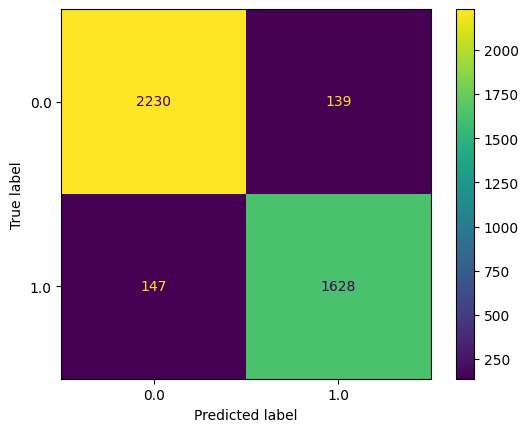

In [ ]:
ConfusionMatrixDisplay.from_estimator(gscv_ab.best_estimator_, X_test,y_test)

In [ ]:
gscv_ab.best_params_

{'learning_rate': 1, 'n_estimators': 30}

In [ ]:
param_grid = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = SVC(random_state=64)

gs = GridSearchCV(svc, param_grid)

gs.fit(X_train, y_train)

gs.best_params_

{'C': 10, 'kernel': 'rbf'}